# Boston House Prices-Advanced Regression Techniques

This dataset contains 14 variables related to housing in the Boston area, including per capita crime rate, residential land zoning, non-retail business acres, and more. The dataset provides a comprehensive view of the Boston housing market, with variables that capture physical, economic, and social attributes of the area. The data includes both continuous and categorical variables, offering opportunities for exploration and analysis.

1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population



what we are going to predict the MEDY using the other features we have

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
plt.style.use('ggplot') 
import warnings 
warnings.filterwarnings('ignore')


# load the data

In [3]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Data exploratory

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


we have 506 entries

In [5]:
describe = data.describe()
describe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<BarContainer object of 14 artists>

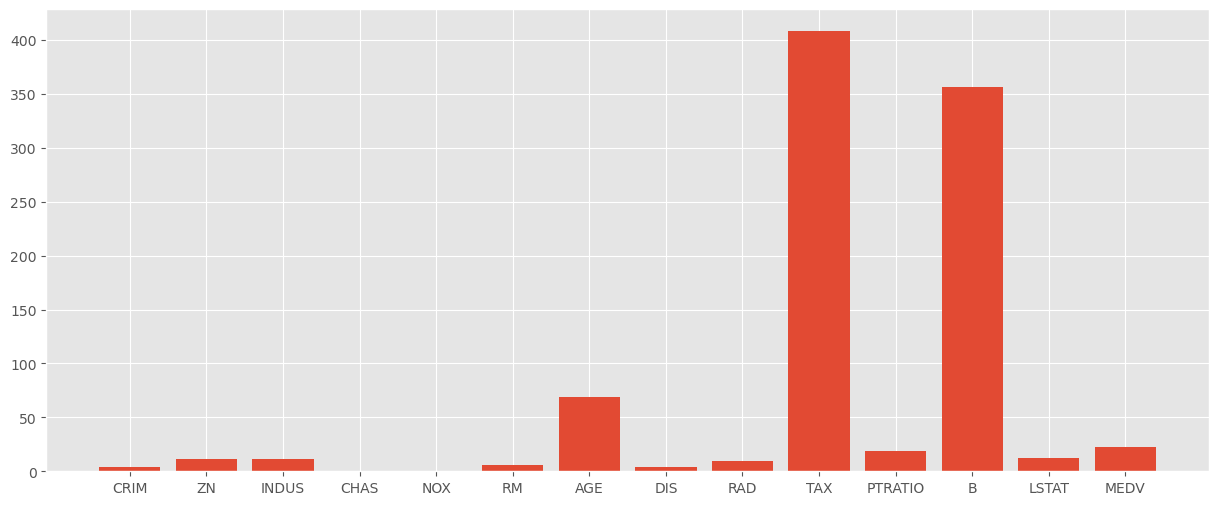

In [6]:
plt.figure(figsize = (15,6))
plt.bar(describe.columns,describe.loc['mean'])


Tax and B is high so we want to set the data in the same range

# data preprocessing

In [7]:
# handle missing data 
data.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

we dont have any missing data 

In [8]:
# check the duplicated data
data.duplicated().sum()

0

we dont have any duplicated data

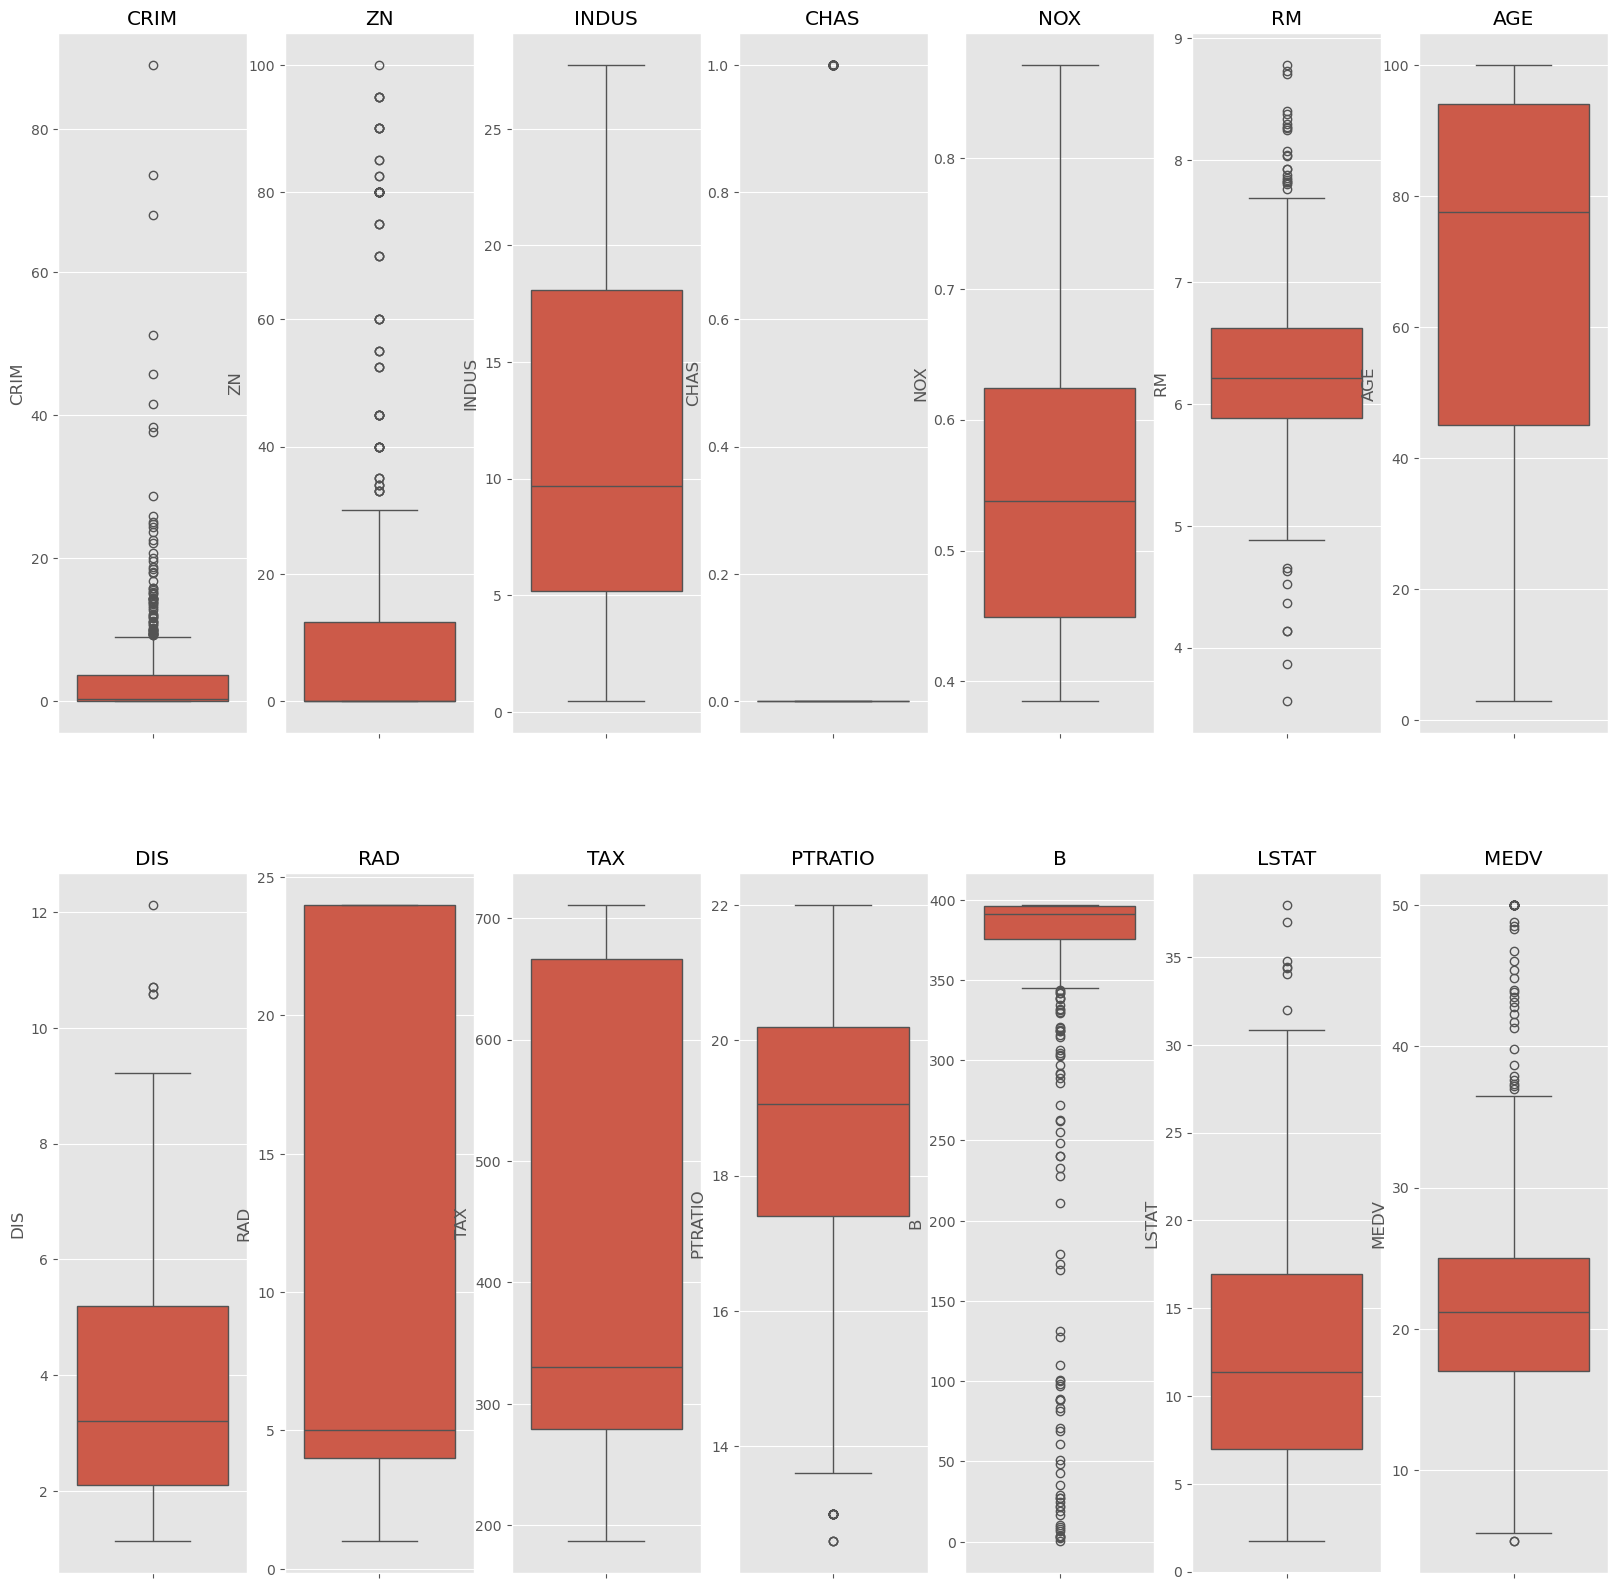

In [9]:
# lets plot the box plot for each columns
columns = data.columns
col_for_loop = np.reshape(columns,(2,7))
fig, axs = plt.subplots(2,7,figsize = (20,20))
for i in range(2):
    for j in range(7) :
        sns.boxplot(data[col_for_loop[i,j]],ax=axs[i,j])
        axs[i,j].set_title(col_for_loop[i,j])




# Data visualization

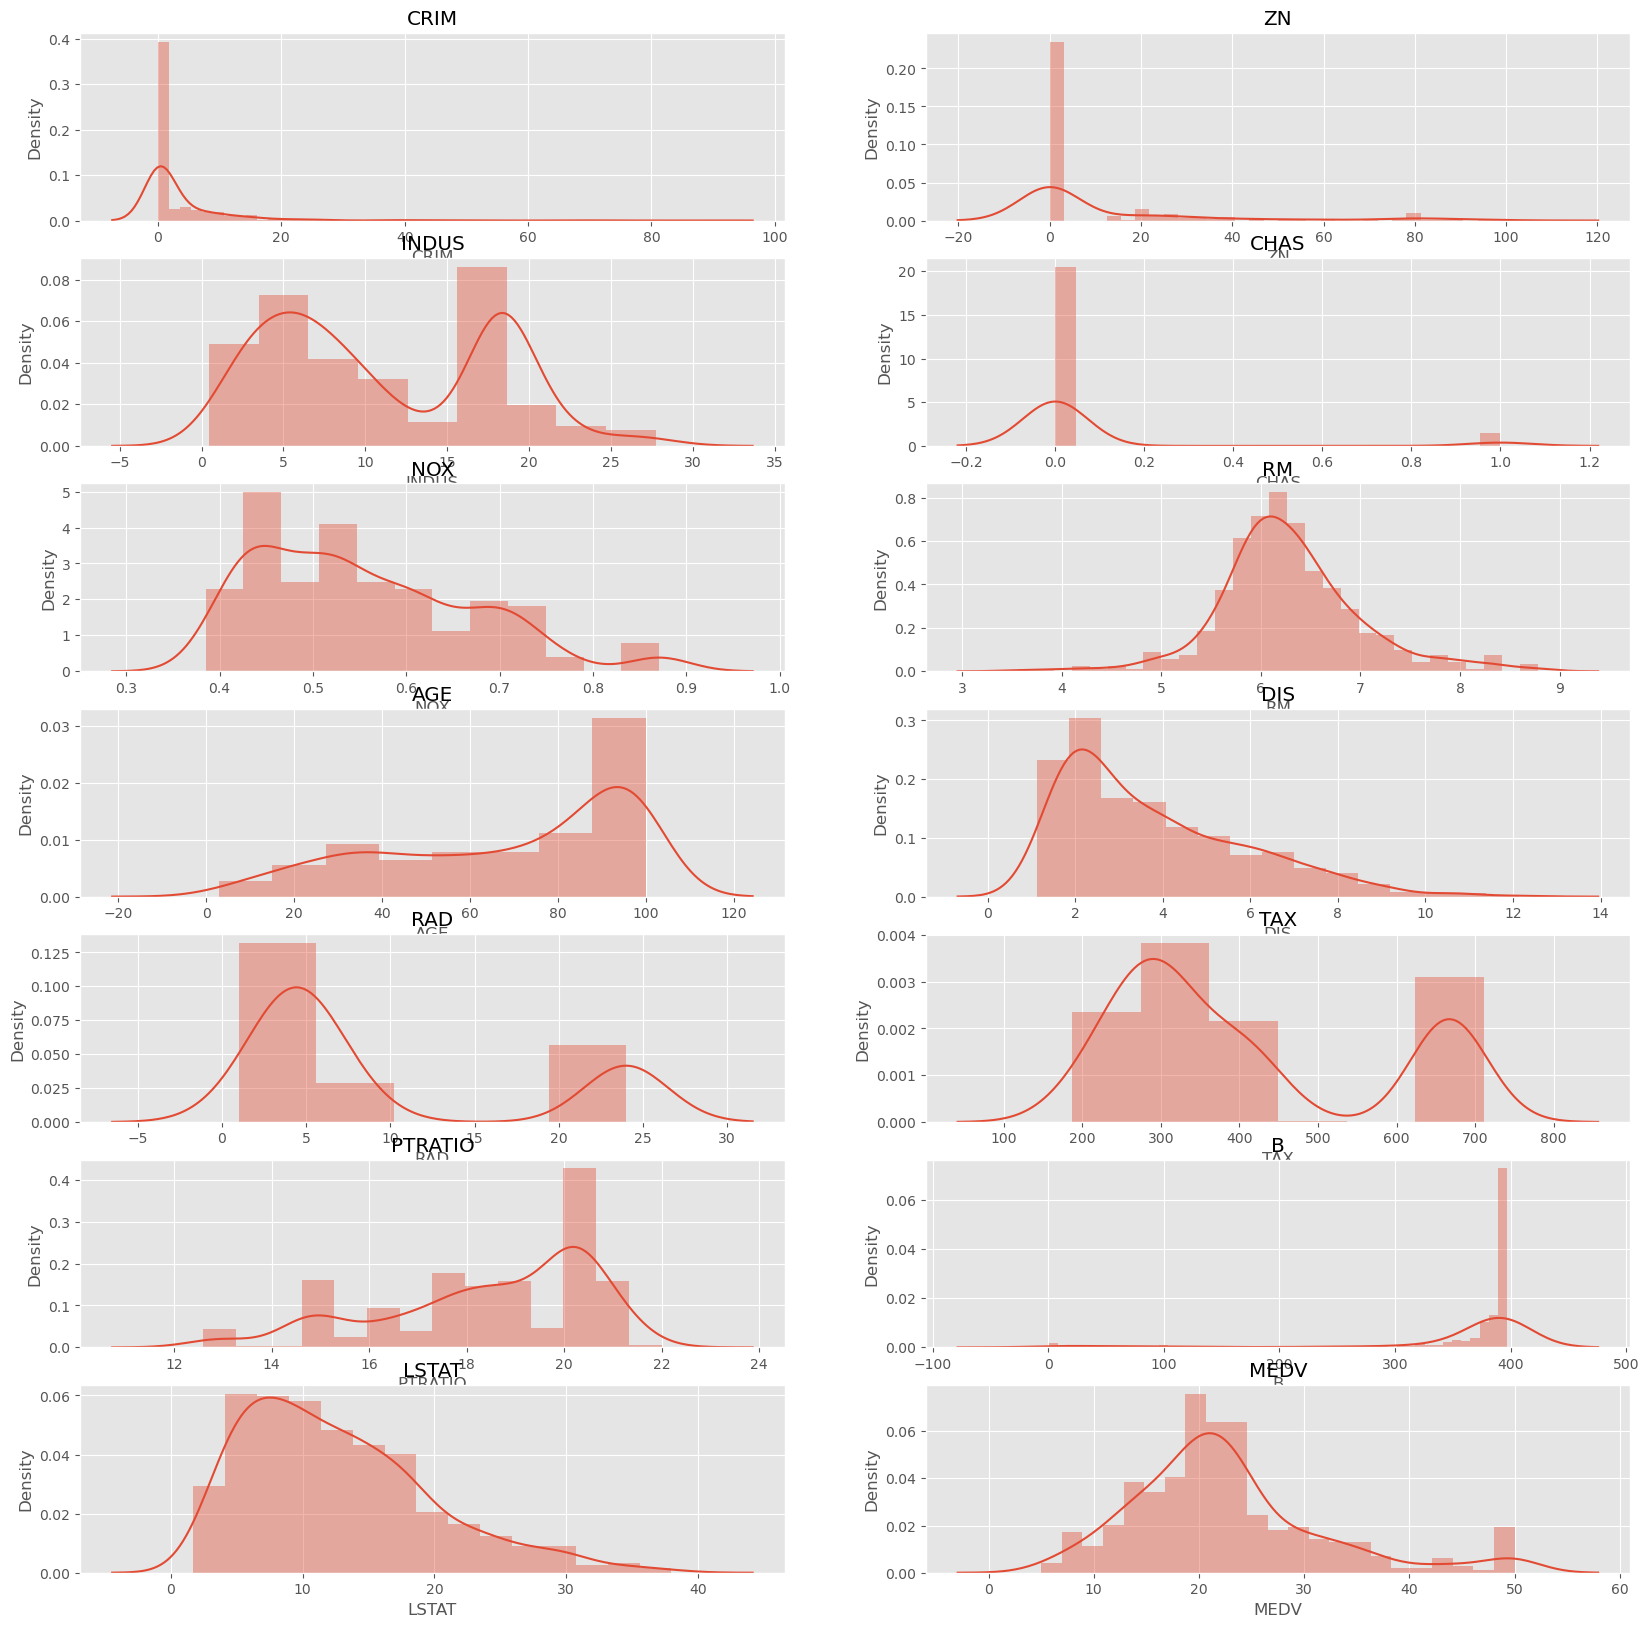

In [10]:
col_for_loop2 = np.reshape(columns,(7,2))
fig, axs = plt.subplots(7,2,figsize = (20,20))
for i in range(7):
    for j in range(2) :
        sns.distplot(data[col_for_loop2[i,j]],ax=axs[i,j])
        axs[i,j].set_title(col_for_loop2[i,j])


# correlation

<Axes: >

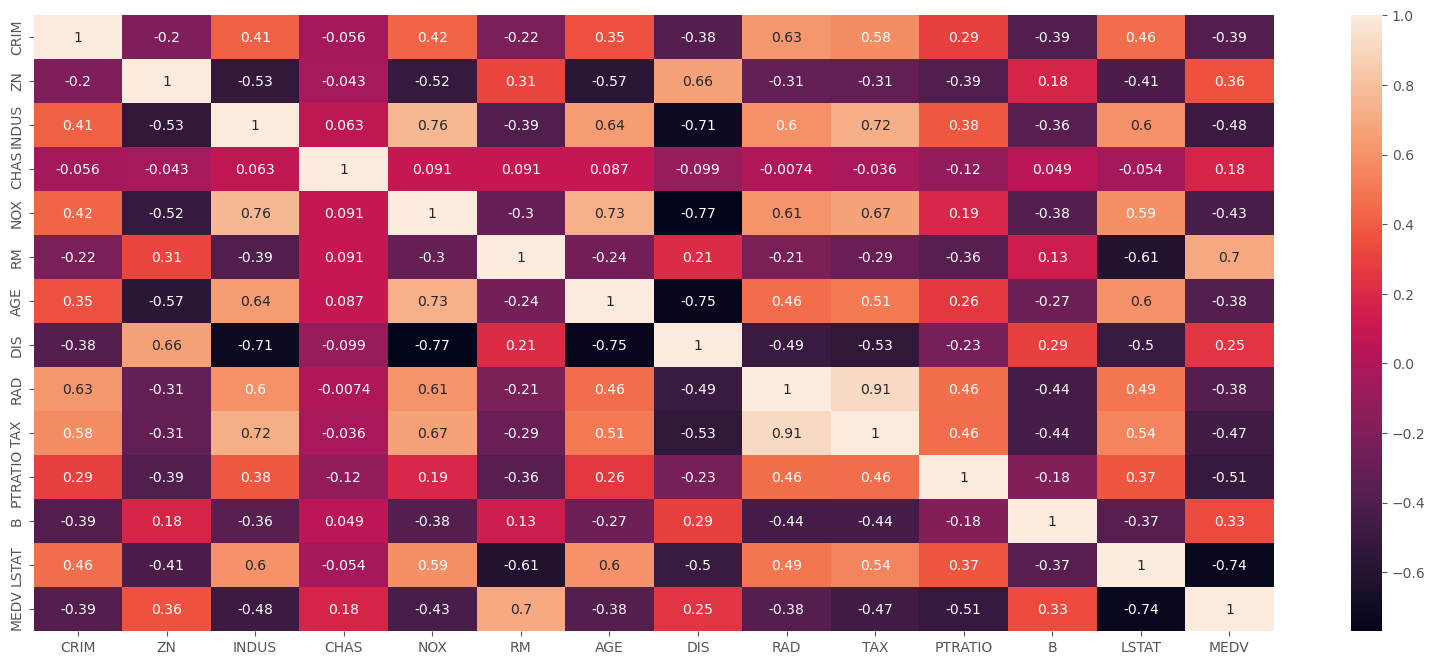

In [11]:
correlation = data.corr()

plt.figure(figsize = (20,8))
sns.heatmap(correlation, annot=True)

In [12]:
# check the high correlation features with MEDV

correlation = data.corr()
ch = np.logical_or(correlation['MEDV'].values >0.5  , correlation['MEDV'].values < -0.5)

most = correlation['MEDV'][ch]

frame_most = pd.DataFrame(most)

frame_most

,MEDV
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


# select the in/dependent features

In [13]:
X = data.drop('MEDV', axis=1)

Y = data['MEDV']

# Split the data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

# Scale the data

In [15]:
st =StandardScaler()
x_train_sc = st.fit_transform(x_train)
x_test_sc = st.transform(x_test)


# linear Regression model

In [16]:
lr = LinearRegression()

lr.fit(x_train_sc,y_train)

LinearRegression()

In [17]:
prediction = lr.predict(x_test_sc)

r2_linear = r2_score(y_test,prediction)
MSE_linear = mean_squared_error(y_test,prediction)

print("the r2_score for linear regresion is ",r2_linear)
print("the mean_squared_error for linear regresion is ",MSE_linear)

the r2_score for linear regresion is  0.7330247212691932
the mean_squared_error for linear regresion is  23.038812866283536


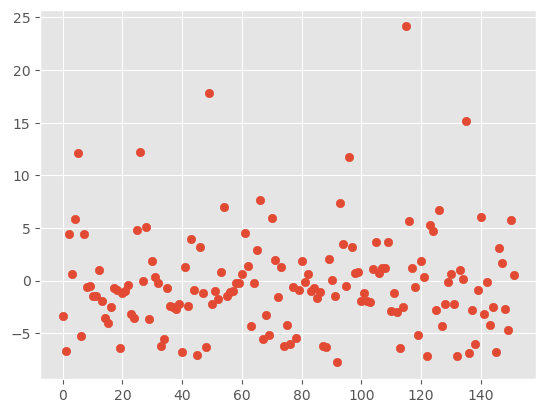

In [18]:
residual = y_test - prediction
plt.scatter(range(len(residual)),residual)

# Random Forest

In [19]:
rf = RandomForestRegressor()

rf.fit(x_train_sc, y_train)

RandomForestRegressor()

In [20]:
prediction2 = rf.predict(x_test_sc)


r2_rf = r2_score(y_test,prediction2)
MSE_rf = mean_squared_error(y_test,prediction2)

print("the r2_score for Random Forest is ",r2_rf)
print("the mean_squared_error for Random Forest is ",MSE_rf)

the r2_score for Random Forest is  0.8824473811894236
the mean_squared_error for Random Forest is  10.144283019736834


# lasso regression

In [21]:
Las = Lasso()

In [22]:
# Lets use GridSearchCV
parm = {
    'alpha' : np.linspace(0.01,1,100)
}

grid_las = GridSearchCV(Las , parm, cv=3)


In [23]:
grid_las.fit(x_train_sc, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])})

In [24]:
prediction3 = grid_las.predict(x_test_sc)

r2_lass = r2_score(y_test,prediction3)
MSE_lass = mean_squared_error(y_test,prediction3)

print("the r2_score for lasso regression is ",r2_lass)
print("the mean_squared_error for lasso regression is ",MSE_lass)

the r2_score for lasso regression is  0.733504199900072
the mean_squared_error for lasso regression is  22.997435932423905


# Ridge Regression

In [25]:
rdg = Ridge()

In [26]:
# Lets use GridSearchCV
parm = {
    'alpha' : np.linspace(0.01,1,100)
}

grid_rdg = GridSearchCV(rdg , parm, cv=3)


In [27]:
grid_rdg.fit(x_train_sc,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])})

In [28]:
prediction4 = grid_rdg.predict(x_test_sc)

r2_rdg = r2_score(y_test,prediction4)
MSE_rdg = mean_squared_error(y_test,prediction4)

print("the r2_score for Ridge regression is ",r2_rdg)
print("the mean_squared_error for Ridge regression is ",MSE_rdg)

the r2_score for Ridge regression is  0.7332071921295396
the mean_squared_error for Ridge regression is  23.023066419552375


# Evaluate the model

In [ ]:
result = {
    
    'Model' : ['Linear', 'Random Forest','lasso' , 'Ridge'],
    'r2 score' : [r2_linear, r2_rf, r2_lass, r2_rdg] ,
    'Mean squared error' : [MSE_linear, MSE_rf, MSE_lass, MSE_rdg]


}

result_dframe = pd.DataFrame(result).set_index('Model')
result_dframe

,r2 score,Mean squared error
Model,,
Linear,0.733025,23.038813
Random Forest,0.893214,9.215202
lasso,0.733504,22.997436
Ridge,0.733207,23.023066


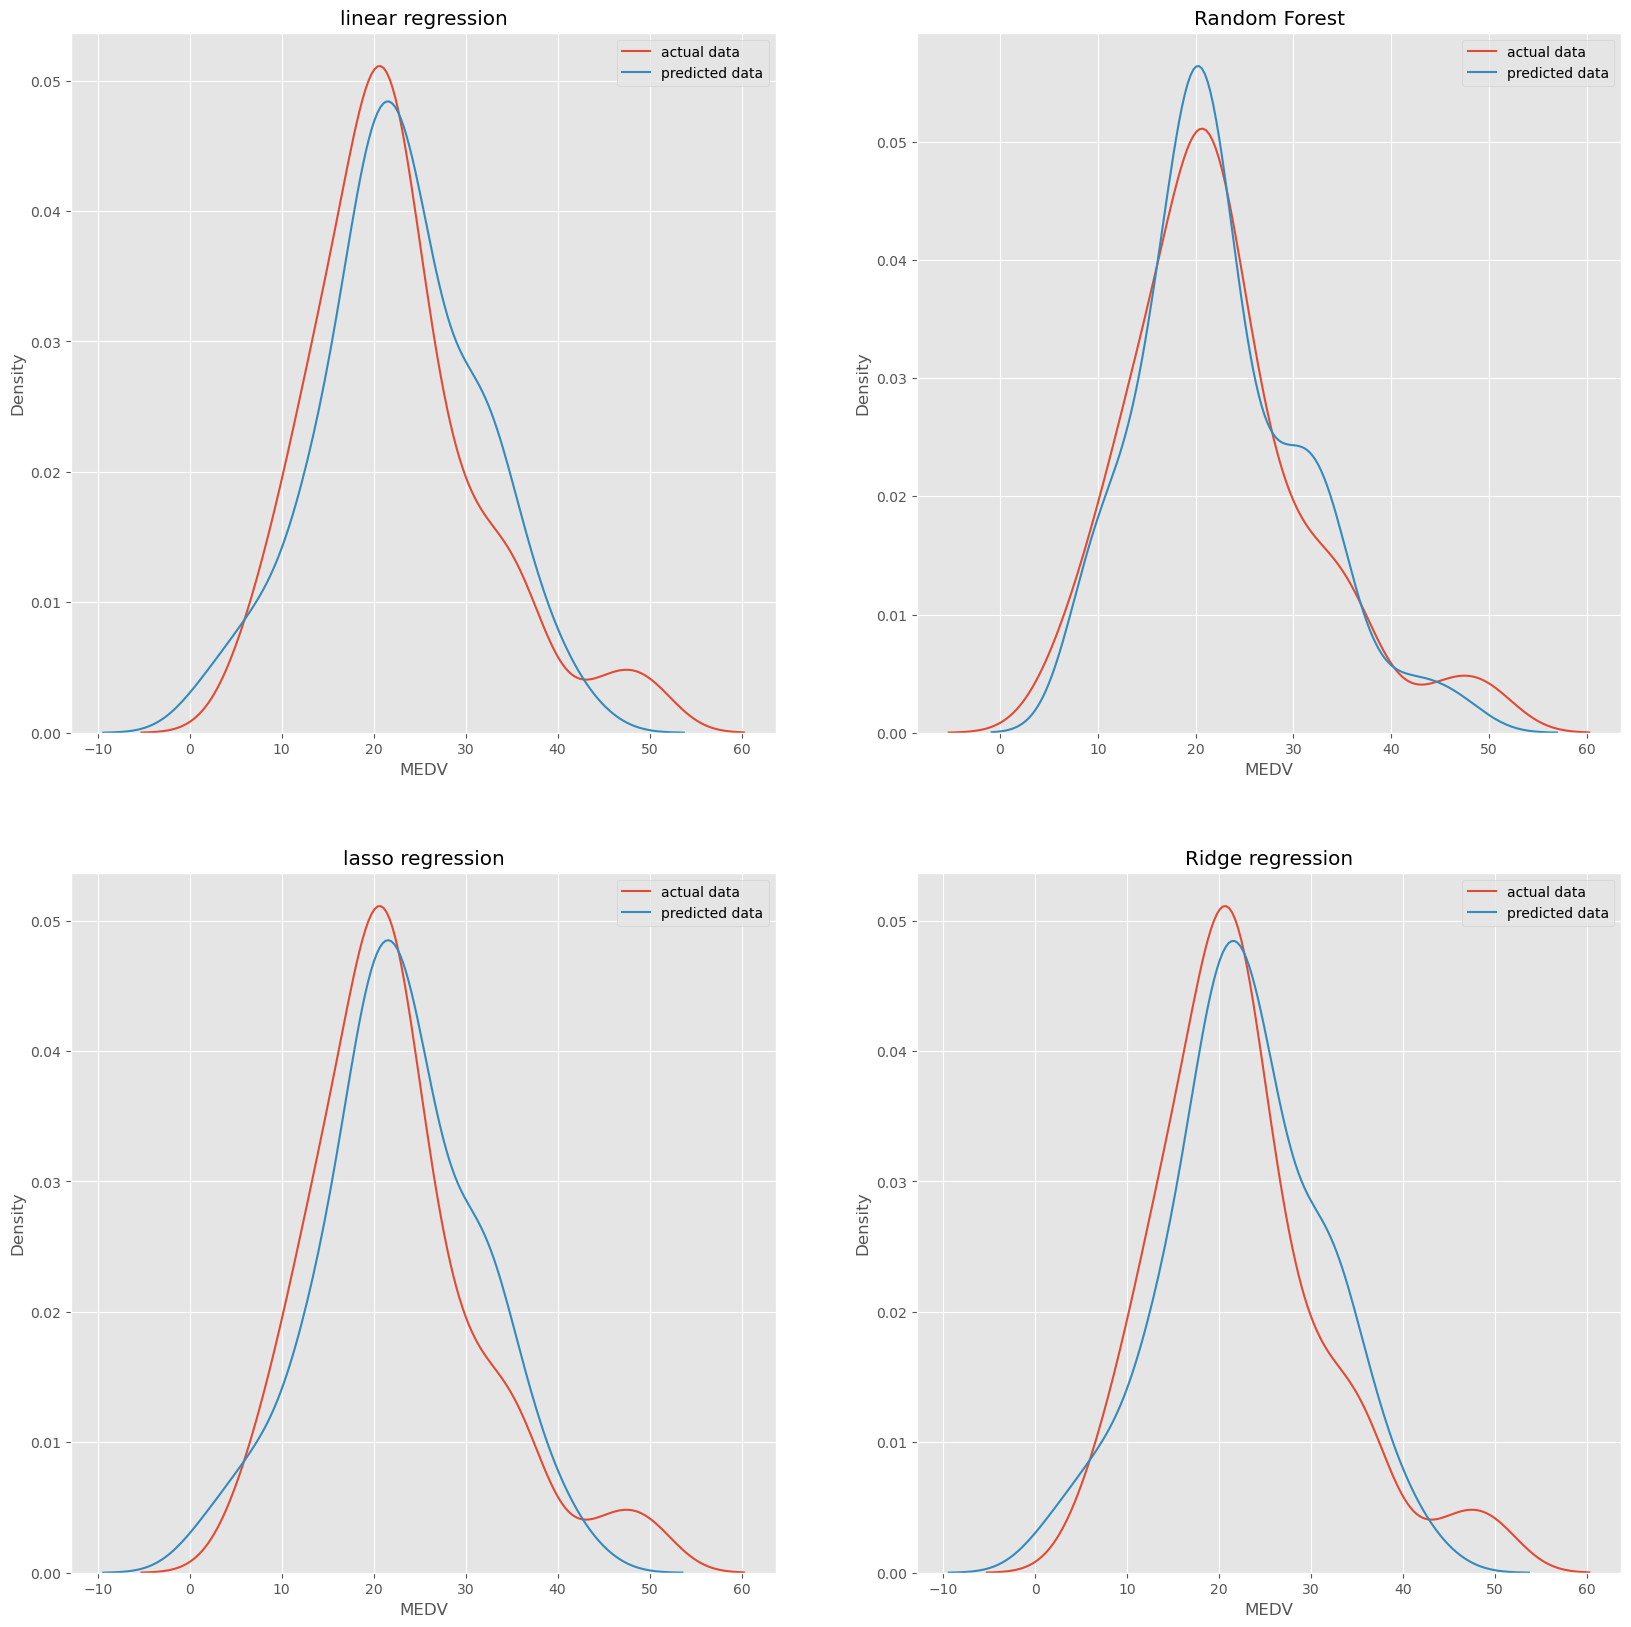

In [37]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax1 = sns.distplot(y_test, hist=False , label='actual data')
sns.distplot(prediction, hist=False,ax=ax1,label='predicted data')
plt.title('linear regression')
plt.legend()

plt.subplot(2,2,2)
ax1 = sns.distplot(y_test, hist=False , label='actual data')
sns.distplot(prediction2, hist=False,ax=ax1,label='predicted data')
plt.title('Random Forest')
plt.legend()

plt.subplot(2,2,3)
ax1 = sns.distplot(y_test, hist=False , label='actual data')
sns.distplot(prediction3, hist=False,ax=ax1,label='predicted data')
plt.title('lasso regression')
plt.legend()

plt.subplot(2,2,4)
ax1 = sns.distplot(y_test, hist=False , label='actual data')
sns.distplot(prediction4, hist=False,ax=ax1,label='predicted data')
plt.title('Ridge regression')
plt.legend()

Based on the R2 score and mean squared error (MSE), here's a summary of the models:

* The Random Forest model has the highest R2 score (0.893214), which indicates it explains the most variability in the data. It also has the lowest MSE (9.215202), which suggests it has the lowest prediction error.

* The Linear, Lasso, and Ridge models have similar R2 scores, ranging from 0.733025 to 0.733504, indicating they explain a similar amount of variability in the data. However, they have higher MSE values, ranging from 22.997436 to 23.038813, indicating higher prediction errors.

Based on these results, I recommend choosing the Random Forest model as the best model. Its higher R2 score and lower MSE suggest it's a better fit for the data.